<a href="https://colab.research.google.com/github/deba75/image_processing/blob/main/imageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import numpy as np

image_path ='/content/drive/MyDrive/jpg_image/IMG_9663.jpg'

img= cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print(f"Couold not read the file: {image_path}")
else:
  for i in range(min(3, img.shape[0])):
    print(f"Row {i+1}: {img[i]}")


Row 1: [243 243 243 ... 239 239 239]
Row 2: [243 243 243 ... 239 239 239]
Row 3: [243 243 243 ... 239 239 239]


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
def gamma_correction(image, gamma=1.0):
  invGamma = 1.0/gamma
  table = np.array([(i / 255.0)** invGamma * 255 for i in np.arange(256)]).astype("uint8")
  return cv2.LUT(image, table)
if img is None:
  print("Image not Loaded. Check the file path")
else:
  gamma_value = 10
  gamma_corrected = gamma_correction(img, gamma_value)

gamma transformation

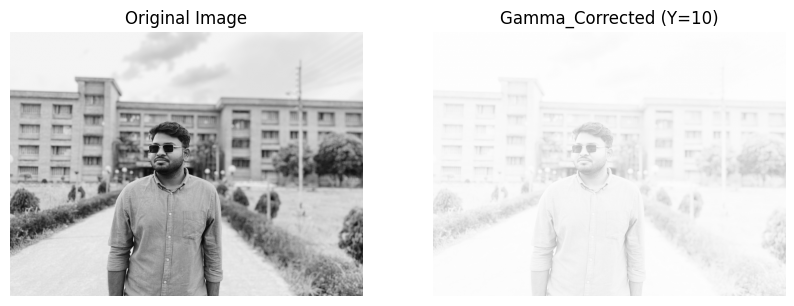

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):
  inv_gamma= 1.0/ gamma
  gamma_corrected = np.power(image/ 255.0, inv_gamma)* 255
  return np.uint8(gamma_corrected)

image = cv2.imread('/content/drive/MyDrive/jpg_image/IMG_9663.jpg', cv2.IMREAD_GRAYSCALE)

gamma_value = 10
gamma_corrected = gamma_correction(image, gamma_value)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap= 'gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gamma_corrected, cmap= 'gray')
plt.title(f"Gamma_Corrected (Y={gamma_value})")
plt.axis("off")

plt.show()


Implementation of Averaging(Box) Filter

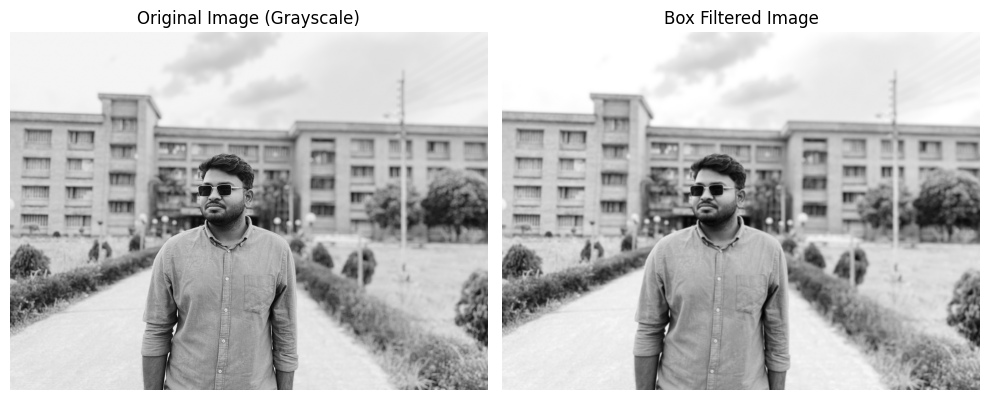

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_gray = cv2.imread('/content/drive/MyDrive/jpg_image/IMG_9663.jpg', cv2.IMREAD_GRAYSCALE)


if image_gray is None:
    print("Error: Could not open or read the image file.")
else:

    kernel_size = (11, 11)
    box_filtered = cv2.blur(image_gray, kernel_size)


    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Original Image (Grayscale)')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(box_filtered, cmap='gray')
    plt.title('Box Filtered Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Gaussian Smoothing filter

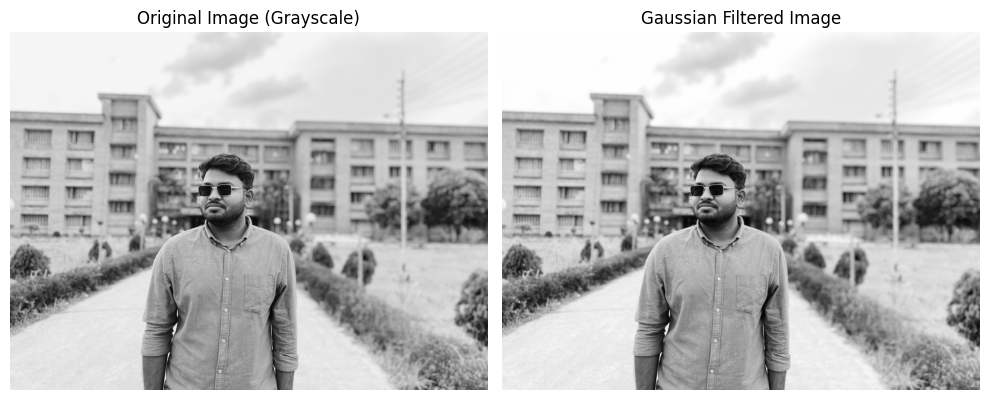

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_color = cv2.imread('/content/drive/MyDrive/jpg_image/IMG_9663.jpg')

image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)


gaussian_filtered = cv2.GaussianBlur(image_gray, (5, 5), sigmaX=7)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Median Filter for Removing Salt-and-Pepper Noise

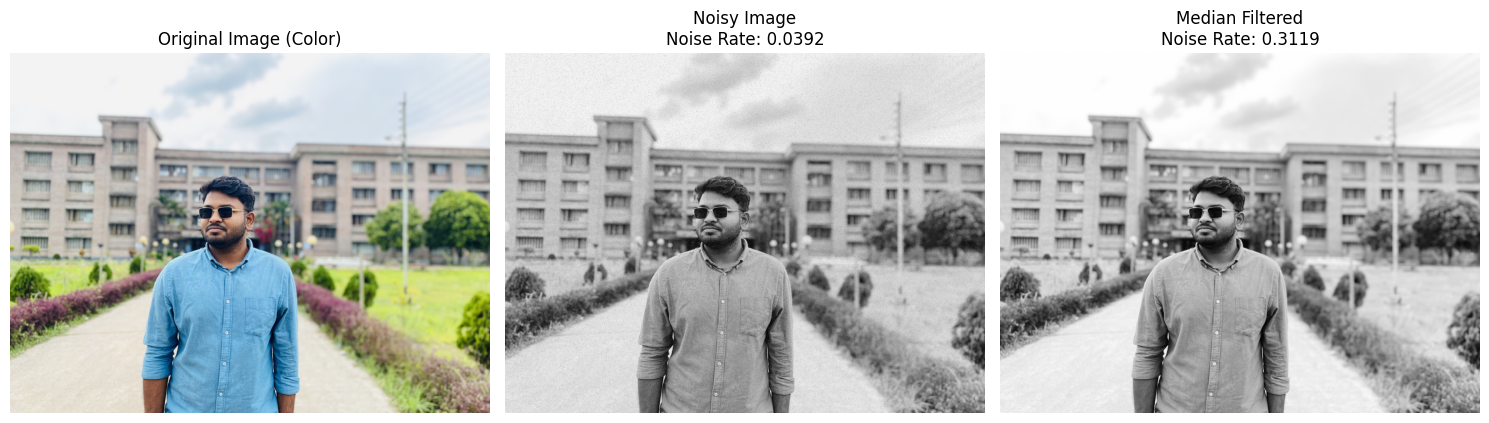

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_color = cv2.imread('/content/drive/MyDrive/jpg_image/IMG_9663.jpg')
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)


def add_salt_and_pepper_noise(img, salt_prob, pepper_prob):
    noisy_img = np.copy(img)
    total_pixels = img.size


    num_salt = int(np.ceil(salt_prob * total_pixels))
    coords = [np.random.randint(0, i, num_salt) for i in img.shape]
    noisy_img[tuple(coords)] = 255

    num_pepper = int(np.ceil(pepper_prob * total_pixels))
    coords = [np.random.randint(0, i, num_pepper) for i in img.shape]
    noisy_img[tuple(coords)] = 0

    return noisy_img.astype(np.uint8)


def calculate_noise_rate(original, compared):
    return np.sum(original != compared) / original.size

noisy_image = add_salt_and_pepper_noise(image_gray, 0.02, 0.02)

median_filtered = cv2.medianBlur(noisy_image, 5)

noise_rate_before = calculate_noise_rate(image_gray, noisy_image)
noise_rate_after = calculate_noise_rate(image_gray, median_filtered)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image (Color)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f"Noisy Image\nNoise Rate: {noise_rate_before:.4f}")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title(f"Median Filtered\nNoise Rate: {noise_rate_after:.4f}")
plt.axis("off")

plt.tight_layout()
plt.show()

Comparative Analysis: Mean, Median and Gaussian Filters for Noise Removal

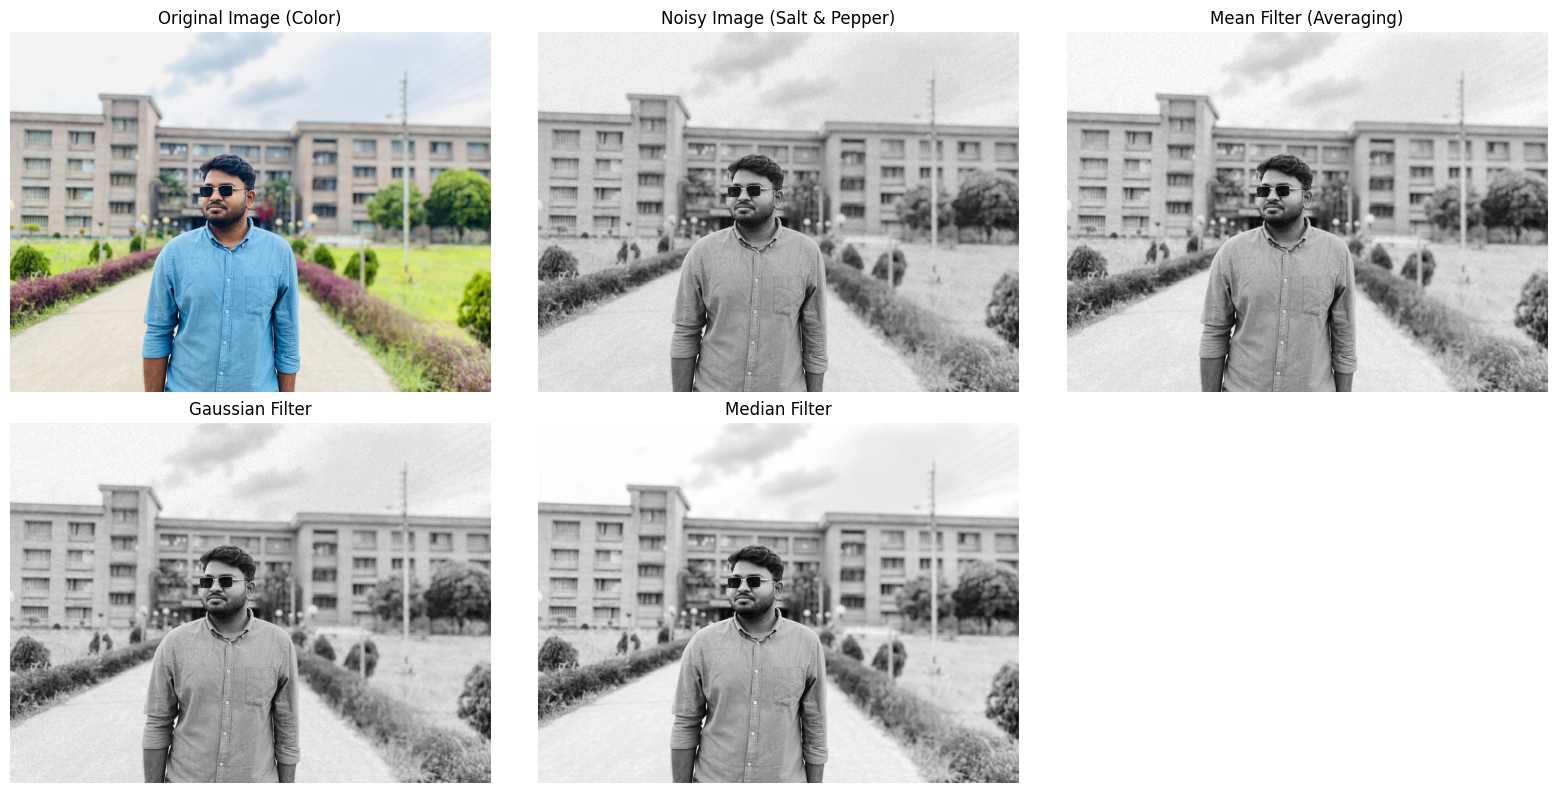

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_color = cv2.imread('/content/drive/MyDrive/jpg_image/IMG_9663.jpg')
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

def add_salt_and_pepper_noise(img, salt_prob, pepper_prob):
    noisy_img = np.copy(img)
    total_pixels = img.size


    num_salt = np.ceil(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
    noisy_img[tuple(coords)] = 255

    num_pepper = np.ceil(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
    noisy_img[tuple(coords)] = 0

    return noisy_img

noisy_image = add_salt_and_pepper_noise(image_gray, 0.02, 0.02)


mean_filtered = cv2.blur(noisy_image, (5, 5))

gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), sigmaX=0)

median_filtered = cv2.medianBlur(noisy_image, 5)

plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1); plt.title("Original Image (Color)"); plt.imshow(image_rgb); plt.axis('off')
plt.subplot(2, 3, 2); plt.title("Noisy Image (Salt & Pepper)"); plt.imshow(noisy_image, cmap='gray'); plt.axis('off')
plt.subplot(2, 3, 3); plt.title("Mean Filter (Averaging)"); plt.imshow(mean_filtered, cmap='gray'); plt.axis('off')
plt.subplot(2, 3, 4); plt.title("Gaussian Filter"); plt.imshow(gaussian_filtered, cmap='gray'); plt.axis('off')
plt.subplot(2, 3, 5); plt.title("Median Filter"); plt.imshow(median_filtered, cmap='gray'); plt.axis('off')

plt.tight_layout()
plt.show()